In [ ]:
import osmium
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)


<Axes: >

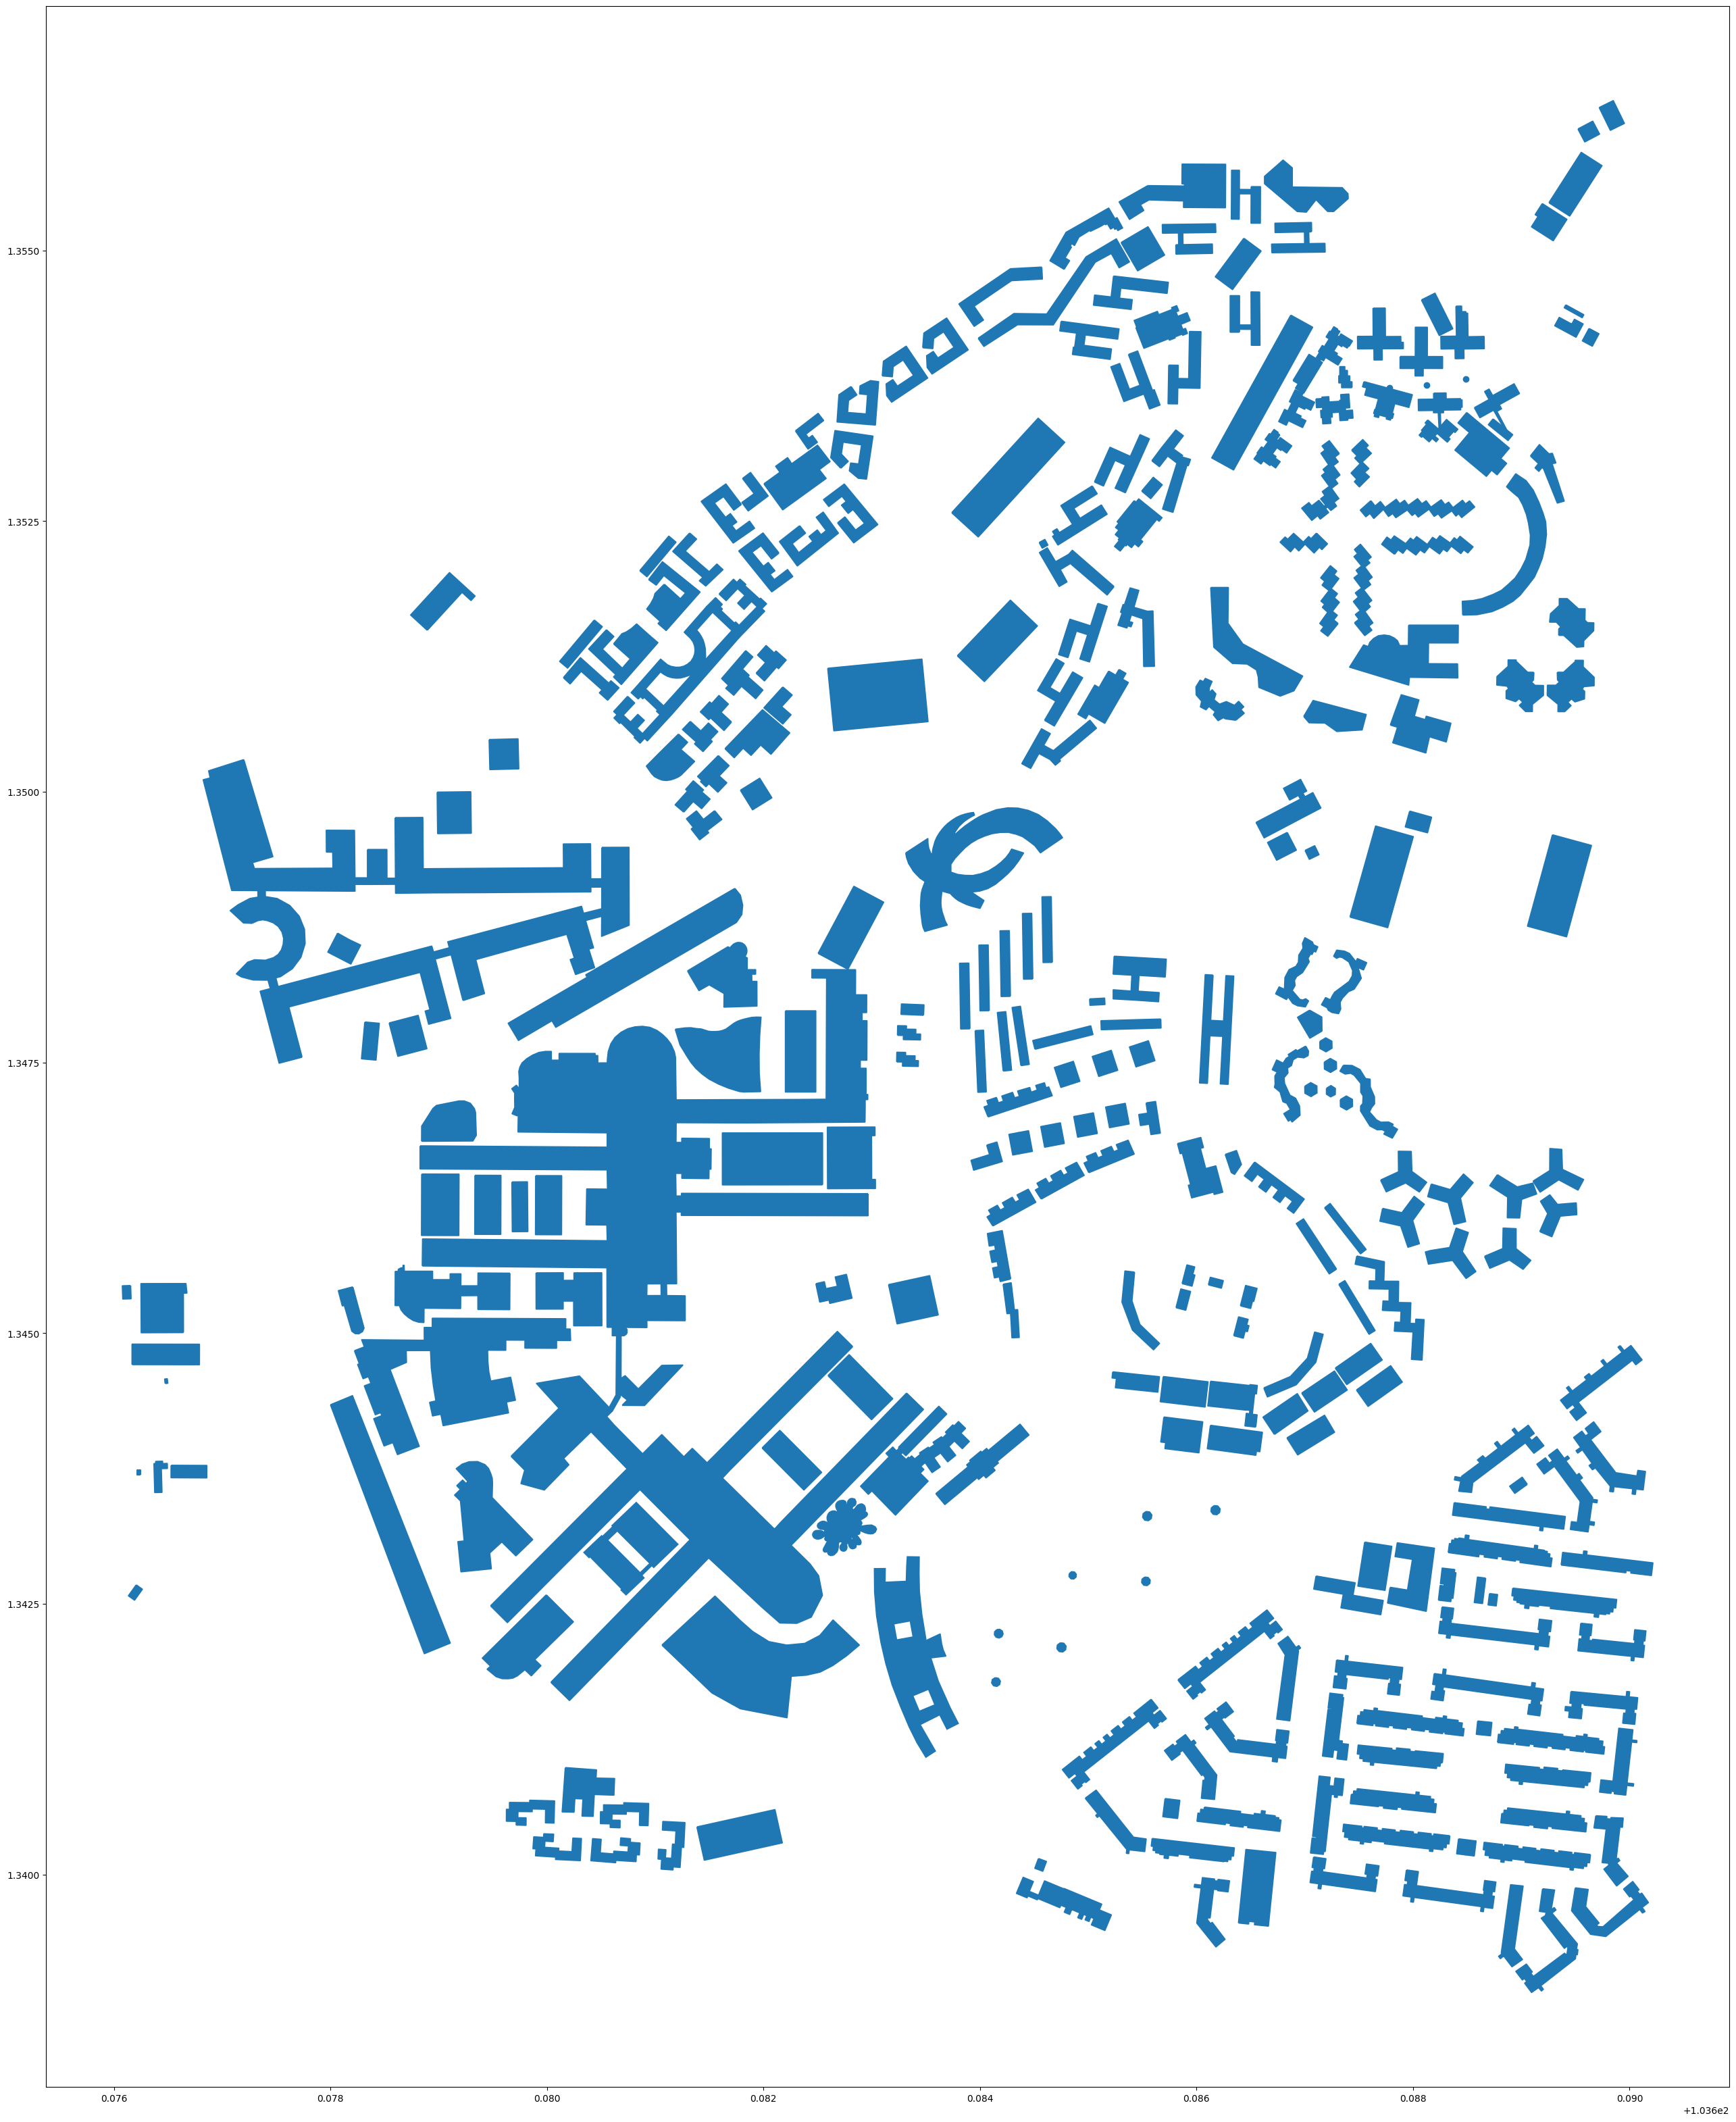

In [73]:
osm_file = "C:\\Users\\jerol\\Desktop\\JS\\foundation\\map.osm"

fp = osmium.FileProcessor(osm_file)\
         .with_areas()\
         .with_filter(osmium.filter.GeoInterfaceFilter())\
         .with_filter(osmium.filter.KeyFilter('building'))

features = gpd.GeoDataFrame.from_features(fp)
fig, ax = plt.subplots(1, 1, figsize=(40,40))
features.plot(ax=ax)

In [ ]:
polys = features.iloc[600:684]
# print(polys)
fig, ax = plt.subplots(1, 1, figsize=(40,40))
polys["geometry"].plot(ax=ax)
plt.show()

In [85]:
filtered = features[features['geometry'].astype(str).str.startswith("MULTIPOLYGON")]
# filtered = filtered["geometry"]
# fig, ax = plt.subplots(1, 1, figsize=(40,40))
# filtered.plot(ax=ax)
# plt.show()

In [86]:
pd.options.display.max_colwidth = 120
print(filtered)

                                                                                                                    geometry  \
343  MULTIPOLYGON (((103.68055 1.34600, 103.68056 1.34585, 103.68055 1.34560, 103.68056 1.34506, 103.68060 1.34506, 103.6...   
344  MULTIPOLYGON (((103.68041 1.34409, 103.68074 1.34375, 103.68070 1.34371, 103.68086 1.34356, 103.68132 1.34309, 103.6...   
345  MULTIPOLYGON (((103.68210 1.34319, 103.68225 1.34304, 103.68226 1.34305, 103.68231 1.34310, 103.68279 1.34359, 103.6...   
346  MULTIPOLYGON (((103.68148 1.34380, 103.68160 1.34368, 103.68162 1.34366, 103.68167 1.34372, 103.68169 1.34373, 103.6...   
347  MULTIPOLYGON (((103.68106 1.34212, 103.68152 1.34168, 103.68179 1.34153, 103.68222 1.34145, 103.68226 1.34183, 103.6...   
..                                                                                                                       ...   
680  MULTIPOLYGON (((103.68302 1.34283, 103.68302 1.34261, 103.68304 1.34239, 103.68308 1.34215, 103.683

In [93]:
import folium

min_lat,min_lon = 1.3399,103.6764
max_lat,max_lon = 1.3562,103.6904
# gdf_wgs84 = features.to_crs(epsg=4326)
m = folium.Map(location=[filtered.geometry.centroid.y.mean(), filtered.geometry.centroid.x.mean()], 
               zoom_start=20,
                max_bounds=True,
                min_lat=min_lat,
                max_lat=max_lat,
                min_lon=min_lon,
                max_lon=max_lon,
            )
for _, row in features.iterrows():
    folium.GeoJson(row['geometry']).add_to(m)
print(m)
# m.save('interactive_map_3.html')


In [100]:
from folium import IFrame

min_lat,min_lon = 1.3399,103.6764
max_lat,max_lon = 1.3562,103.6904
# gdf_wgs84 = features.to_crs(epsg=4326)
m = folium.Map(location=[filtered.geometry.centroid.y.mean(), filtered.geometry.centroid.x.mean()], 
               zoom_start=20,
                max_bounds=True,
                min_lat=min_lat,
                max_lat=max_lat,
                min_lon=min_lon,
                max_lon=max_lon,
            )

# JavaScript for handling click events and changing polygon styles
js_code = '''
function onEachFeature(feature, layer) {
    layer.on('click', function (e) {
        if (layer.options.color === 'blue') {
            layer.setStyle({
                color: 'red'  // Change line color to red on click
            });
            feature.properties.clicked = true;  // Mark the feature as clicked
        } else {
            layer.setStyle({
                color: 'blue'  // Reset line color to blue if clicked again
            });
            feature.properties.clicked = false;  // Reset clicked state
        }
    });
}
'''

# Convert GeoDataFrame to GeoJSON format
geojson_data = filtered["geometry"].to_json()
# print(geojson_data)

for _, row in features.iterrows():
    folium.GeoJson(
        row['geometry'],  # Each individual geometry
        # Add the JavaScript function to handle click events
        on_each_feature=js_code  # Injecting the JavaScript click handling code
    ).add_to(m)

# Save the map with interactive click handling
m.save('interactive_map_4.html')
